In [37]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [38]:
from google.colab import drive 
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Capstone/Scripts/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Features

In [39]:
feature_amenities = pd.read_csv('./Amenities_part/amenities.csv') ### long lat should not be here
feature_location = pickle.load(open('./Location_part/area_features.pkl', 'rb'))
feature_image = pd.read_csv('./Image_part/image_features.csv')
feature_NLP = pd.read_csv('./NLP_part/NER.csv',skiprows=1).rename(columns={'Unnamed: 0':'id'})


In [40]:
ori_data = pd.read_csv('../Data/LA_Airbnb/listings_detailed.csv')

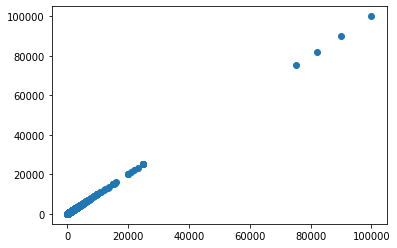

In [43]:


plt.scatter(feature_amenities.price,[float(str(i).replace('$','').split('.')[0].replace(',','')) for i in ori_data['price'].values])

# Merging


In [ ]:
all_features = pd.concat([
    ori_data[['id']],feature_amenities             ## concat id with amenities featues
],axis=1).merge(
    feature_location, left_on='id', right_on='id', how='left' ## merge location features
).merge(
    feature_image.rename(columns={'room_id':'id'}), left_on='id', right_on='id', how='left' ## merge image features
).merge(
    feature_NLP, left_on='id', right_on='id', how='left' ## merge NLP features
)

In [28]:
all_features.shape

(40438, 1394)

In [ ]:
all_features.head(10)

,id,price,latitude,longitude,property_type_code,room_type_code,neighbourhood_cleansed_code,bedrooms,beds,bathrooms_type_code,...,• fast &,관광을 원하시면 믿을수있는 여행사를,관광이나 라스베가스,냉장고가 준비되어 있으므로 각자의 음식을 잘표기해서,세탁실이,아주,주방에,주차장을 언제든지,편한고급가구와 메트리스이고 고급침구류를 제공해서,하실수
0,65467,300.0,34.02438,-118.38374,22,2,52,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,206662,46.0,34.10420,-118.34748,14,2,104,1.0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67089,140.0,34.00985,-118.40798,21,0,52,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210489,340.0,34.05303,-118.39449,42,0,169,3.0,5.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109,115.0,33.98301,-118.38607,14,0,52,2.0,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2708,118.0,34.09625,-118.34605,34,2,102,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,67792,375.0,34.08187,-118.38965,5,0,250,3.0,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,69015,901.0,33.89581,-118.02588,34,3,115,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2732,179.0,34.00440,-118.48095,34,2,194,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,210855,69.0,34.02447,-118.48942,14,2,194,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Saving all combined features

In [ ]:
all_features.to_csv('LA_extracted_features_raw.csv',index=False)

In [ ]:
all_features = pd.read_csv('LA_extracted_features_raw.csv')

# Modeling

## First thing first: Train_test_split


In [ ]:
all_features_no_first3000 = all_features.iloc[3000:,:] 
### the first 3000 records was used to train a image regressor


In [ ]:
from sklearn.model_selection import train_test_split
## define X
X = all_features_no_first3000.iloc[:,2:]
X = X.astype('float')
X[X==np.inf] = np.nan

## define y
y = all_features_no_first3000.iloc[:,1]
y = y.astype('float')

## train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [34]:
y.max()

99999.0

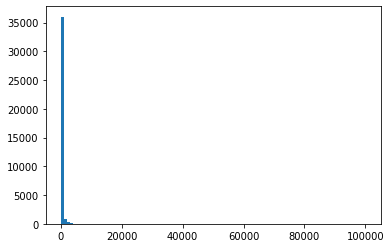

In [36]:
plt.hist(y,bins=100)
plt.show()

In [ ]:
### identify the four feature parts
amenities_f_list = list(all_features.columns[4:171])
location_f_list = list(all_features.columns[171:178]) + ['longitude','latitude']
image_f_list = list(all_features.columns[178:795])
NLP_f_list = list(all_features.columns[795:])


In [29]:
len(amenities_f_list),len(location_f_list),len(image_f_list),len(NLP_f_list)

(167, 9, 617, 599)

In [ ]:
all_features_no_first3000[location_f_list]

,supermarket,BusStop_distance,Station_distance,restaurant_x,mean_area_accommodates_price,mean_area_beds_price,real_estate,longitude,latitude
3000,2,inf,inf,37,234.57692,167.353149,1.076751e+06,-118.43211,34.04883
3001,0,inf,inf,8,487.21430,556.933350,NaN,-118.33125,33.35234
3002,0,inf,inf,6,718.50000,NaN,2.850703e+06,-118.39367,33.88053
3003,0,inf,inf,11,89.58763,97.099174,1.140309e+06,-118.26255,34.06511
3004,2,inf,inf,29,140.20863,141.064377,8.996664e+05,-118.31753,34.09509
...,...,...,...,...,...,...,...,...,...
40433,3,inf,inf,3,109.52029,117.845741,1.068720e+06,-118.34462,34.09101
40434,2,inf,inf,0,184.17241,224.250000,1.251735e+06,-118.43066,33.97551
40435,0,0.003458,inf,0,88.85714,153.956528,8.237350e+05,-118.32089,34.01423
40436,1,inf,inf,6,174.60000,146.272720,1.043530e+06,-118.39341,33.98519


## Define scoring functions

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr
def scoring(pred, truth):
  res = {
      'r2': r2_score(pred, truth),
      'mean_squared_error':mean_squared_error(pred, truth),
      'spearmanr':spearmanr(pred, truth)[0]
  }
  print(res)
  return res

## Model fitting: strategy 1 -- raw input


In [ ]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

class pre_processing_pipeline():
  def __init__(self):
    ## missing values
    self.imputer = SimpleImputer(strategy='constant', fill_value=-1)
  def fit(self,X):
    self.imputer.fit(X)
  def transform(self,X):
    return self.imputer.transform(X)
  def fit_transform(self,X):
    self.fit(X)
    return self.transform(X)

s1_proccessor = pre_processing_pipeline() ## define pipeline
s1_model = XGBRegressor(random_state=42).fit(s1_proccessor.fit_transform(X_train), y_train) ## fit
s1_pred = s1_model.predict(s1_proccessor.transform(X_test))  ## predict
s1_scores = scoring(s1_pred, y_test) ## scoring


{'r2': -2.445612751093057, 'mean_squared_error': 1389866.4020930554, 'spearmanr': 0.8053762773940356}


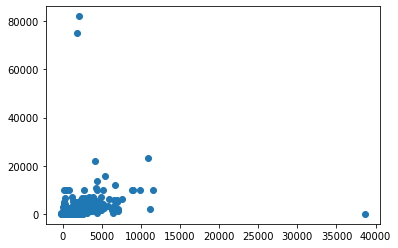

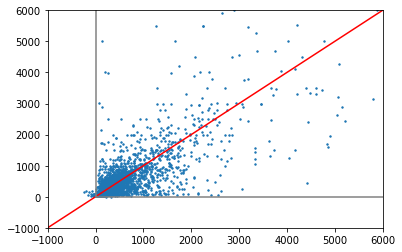

<ipython-input-50-17b43955ab37>:12: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(s1_pred+1), np.log(y_test+1),s=2)


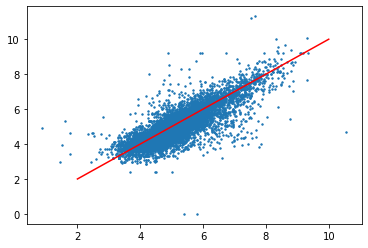

In [ ]:
plt.scatter(s1_pred, y_test)
plt.show()

plt.scatter(s1_pred, y_test,s=2)
plt.xlim(-1000,6000)
plt.ylim(-1000,6000)
plt.plot([-1000,6000],[-1000,6000],c='red')
plt.plot([0,0],[0,6000],c='grey')
plt.plot([0,6000],[0,0],c='grey')
plt.show()

plt.scatter(np.log(s1_pred+1), np.log(y_test+1),s=2)
plt.plot([2,10],[2,10],c='red')
plt.show()


In [ ]:

sorted(dict(
    zip(X_train.columns, s1_model.feature_importances_)
).items(),key=lambda x:-x[1])


quantile regression

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor

class pre_processing_pipeline():
  def __init__(self):
    ## missing values
    self.imputer = SimpleImputer(strategy='constant', fill_value=-1)
  def fit(self,X):
    self.imputer.fit(X)
  def transform(self,X):
    return self.imputer.transform(X)
  def fit_transform(self,X):
    self.fit(X)
    return self.transform(X)

s1_proccessor = pre_processing_pipeline() ## define pipeline
new_X_train = s1_proccessor.fit_transform(X_train)

# define quantiles
quantiles = [0.05, 0.5, 0.95]

# fit models for each quantile
models = []
for q in tqdm(quantiles):
    model = HistGradientBoostingRegressor(loss="quantile", quantile=q, random_state=42)
    model.fit(new_X_train, y_train)
    models.append(model)


100%|██████████| 3/3 [04:46<00:00, 95.43s/it]


In [ ]:
s1_pred = models[1].predict(s1_proccessor.transform(X_test))  ## predict
s1_scores = scoring(s1_pred, y_test) ## scoring
## score of 0.5 quantile

{'r2': -10.976612431158166, 'mean_squared_error': 1328098.1102329872, 'spearmanr': 0.8728009393607601}


In [ ]:
pred_5 = models[0].predict(s1_proccessor.transform(X_test))
pred_50 = models[1].predict(s1_proccessor.transform(X_test))
pred_95 = models[2].predict(s1_proccessor.transform(X_test))




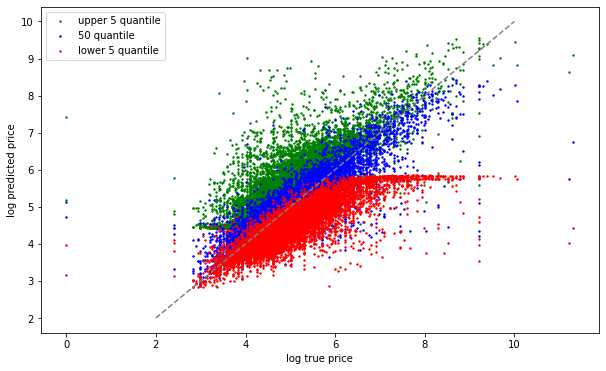

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(np.log(y_test+1), np.log(pred_95+1),s=2,color='green',label='upper 5 quantile')
plt.scatter(np.log(y_test+1), np.log(pred_50+1),s=2,color='blue',label='50 quantile')
plt.scatter(np.log(y_test+1), np.log(pred_5+1),s=2,color='red',label='lower 5 quantile')
plt.plot([2,10],[2,10],linestyle='dashed',c='grey')
plt.xlabel('log true price')
plt.ylabel('log predicted price')
plt.legend()
plt.show()


## Model fitting: strategy 2 -- raw input, but log loss

In [ ]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

class pre_processing_pipeline():
  def __init__(self):
    ## missing values
    self.imputer = SimpleImputer(strategy='constant', fill_value=-1)
  def fit(self,X):
    self.imputer.fit(X)
  def transform(self,X):
    return self.imputer.transform(X)
  def fit_transform(self,X):
    self.fit(X)
    return self.transform(X)

s2_proccessor = pre_processing_pipeline() ## define pipeline
s2_model = XGBRegressor(objective='reg:squaredlogerror', random_state=42).fit(s2_proccessor.fit_transform(X_train), y_train) ## fit
s2_pred = s2_model.predict(s2_proccessor.transform(X_test))  ## predict
s2_scores = scoring(s2_pred, y_test) ## scoring


In [ ]:
s2_scores = scoring(s2_pred, y_test) ## scoring

{'r2': -137.13664244756447, 'mean_squared_error': 538194.3569005145, 'spearmanr': 0.0}


## Model fitting: strategy 3 -- Feature selection based on raw data

In [ ]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

class pre_processing_pipeline():
  def __init__(self):
    ## missing values
    self.imputer = SimpleImputer(strategy='constant', fill_value=-1)
    self.feature_selection_model = ExtraTreesRegressor(n_estimators=50)

  def fit(self, X, y):
    X_new = self.imputer.fit_transform(X)
    self.feature_selection_model.fit(X, y)
    self.SelectFromModel = SelectFromModel(self.feature_selection_model, prefit=True)

  def transform(self,X):
    self.imputer.transform(X)
    X_new = self.SelectFromModel.transform(X)
    return X_new

  def fit_transform(self,X,y):
    self.fit(X,y)
    return self.transform(X)

s2_proccessor = pre_processing_pipeline() ## define pipeline
X_new = s2_proccessor.fit_transform(X_train, y_train)
s2_model = XGBRegressor(objective='reg:squaredlogerror', random_state=42).fit(X_new, y_train) ## fit
s2_pred = s2_model.predict(s2_proccessor.transform(X_test))  ## predict
s2_scores = scoring(s2_pred, y_test) ## scoring


In [ ]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

class pre_processing_pipeline():
  def __init__(self):
    ## missing values
    self.imputer = SimpleImputer(strategy='constant', fill_value=-1)
    self.feature_selection_model = ExtraTreesRegressor(n_estimators=50)

  def fit(self, X, y):
    X_new = self.imputer.fit_transform(X)
    self.feature_selection_model.fit(X_new, y)
    self.SelectFromModel = SelectFromModel(self.feature_selection_model, prefit=True)

  def transform(self,X):
    self.imputer.transform(X)
    X_new = self.SelectFromModel.transform(X)
    return X_new

  def fit_transform(self,X,y):
    self.fit(X,y)
    return self.transform(X)

s2_proccessor = pre_processing_pipeline() ## define pipeline
X_new = s2_proccessor.fit_transform(X_train, y_train)


## Model fitting: strategy 3 -- Reduce dimention by the four part

In [30]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

amenities_f_list = list(all_features.columns[4:171])
location_f_list = list(all_features.columns[171:178]) + ['longitude','latitude']
image_f_list = list(all_features.columns[178:795])
NLP_f_list = list(all_features.columns[795:])

class pre_processing_pipeline():
  def __init__(self,features_sub_lists):
    ## missing values
    self.imputer = SimpleImputer(strategy='constant', fill_value=-1)
    self.reducer_amenities = PCA(n_components=10)
    self.reducer_location = PCA(n_components=5)
    self.reducer_image = PCA(n_components=10)
    self.reducer_NLP = PCA(n_components=10)
    self.features_sub_lists = features_sub_lists
    
  def fit(self,X):
    new_X = pd.DataFrame(self.imputer.fit_transform(X), columns=X.columns)
    self.reducer_amenities.fit(new_X[self.features_sub_lists[0]])
    self.reducer_location.fit(new_X[self.features_sub_lists[1]])
    self.reducer_image.fit(new_X[self.features_sub_lists[2]])
    self.reducer_NLP.fit(new_X[self.features_sub_lists[3]])

  def transform(self,X):
    new_X = pd.DataFrame(self.imputer.transform(X), columns=X.columns)
    new_X1 = self.reducer_amenities.transform(new_X[self.features_sub_lists[0]])
    new_X2 = self.reducer_location.transform(new_X[self.features_sub_lists[1]])
    new_X3 = self.reducer_image.transform(new_X[self.features_sub_lists[2]])
    new_X4 = self.reducer_NLP.transform(new_X[self.features_sub_lists[3]])
    return np.concatenate([new_X1,new_X2,new_X3,new_X4], axis=1)

  def fit_transform(self,X):
    self.fit(X)
    return self.transform(X)

s2_proccessor = pre_processing_pipeline([amenities_f_list, location_f_list, image_f_list, NLP_f_list]) ## define pipeline
s2_model = RandomForestRegressor(random_state=42,oob_score=True).fit(s2_proccessor.fit_transform(X_train), y_train) ## fit
s2_pred = s2_model.predict(s2_proccessor.transform(X_test))  ## predict
s2_scores = scoring(s2_pred, y_test) ## scoring


{'r2': -1.009792191698462, 'mean_squared_error': 1278720.8351434187, 'spearmanr': 0.8298194640568796}


In [33]:
s2_model.oob_score_

0.1913658231174068

In [ ]:
model = XGBRegressor().fit(X_train[['longitude','latitude']], np.log(y_train+1))

In [ ]:
r2_score(
    model.predict(X_test[['longitude','latitude']]),
    np.log(y_test+1)
)


-1.1890753905697213

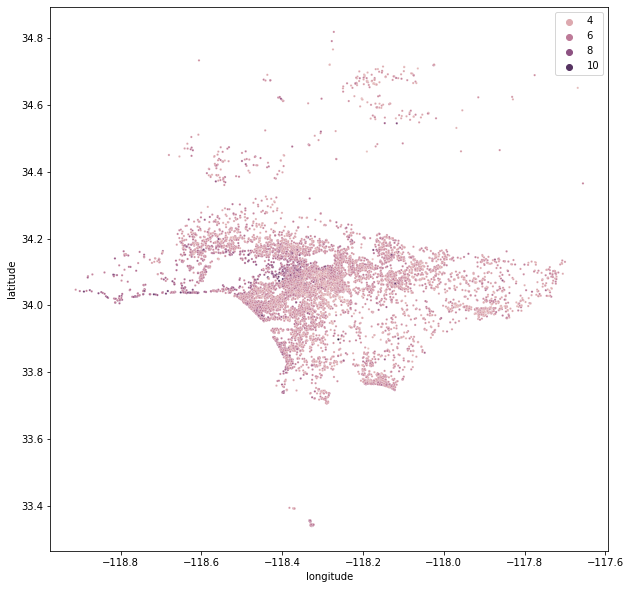

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_test['longitude'],
         y=X_test['latitude'],
         hue=np.log(y_test.values+1),s=5)

plt.show()


In [ ]:
y_train

38197    150.0
28782    179.0
2139      53.0
36965     87.0
33459     47.0
         ...  
2259      80.0
11296    225.0
3298     102.0
8012     200.0
19612     97.0
Name: price, Length: 28306, dtype: float64